# EE511 Project 8

### Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

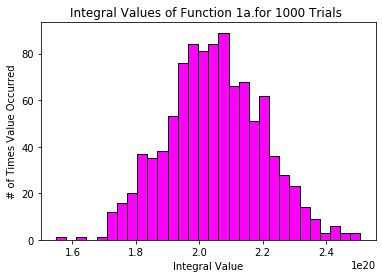

In [2]:
trials = 1000
samples = 1000
integrals = np.empty(trials)
integral_range = 1
def func_1(x1,x2):
    return np.exp(5* (np.abs(x1-5) + np.abs(x2-5)))

for i in range(0,trials):
    integral_sum = 0
    x1_rand = np.zeros(samples) 
    x2_rand = np.zeros(samples) 
    for j in range(0,samples):
        x1_rand[j] = np.random.rand()
        x2_rand[j] = np.random.rand()
        integral_sum += func_1(x1_rand[j], x2_rand[j])
    integral_sum = integral_sum * integral_range / samples
    integrals[i] = (integral_sum)
plt.hist(integrals, bins = 30, edgecolor = 'black', facecolor = 'magenta' )
plt.xlabel("Integral Value")
plt.ylabel("# of Times Value Occurred")
plt.title("Integral Values of Function 1a.for 1000 Trials ")
plt.style.use('fivethirtyeight')
plt.show()


In [3]:
print("True answer is 2.04e20")
print("Mean from 1000 trials: ", np.mean(integrals))
print("Variance from 1000 trials: ", np.var(integrals))

True answer is 2.04e20
Mean from 1000 trials:  2.0485767126098238e+20
Variance from 1000 trials:  2.259202305532061e+38


#### Function 1a with Stratification

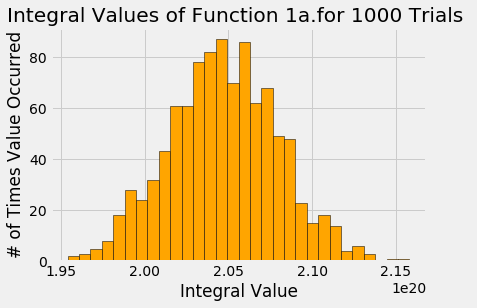

In [4]:

k = 10
integrals_strat = np.empty(trials)
n_ij = int(samples/(k*k)) #stratified into partitions of 10 with equal probability for each xi
#print(n_ij)
for sample in range(0,1000):
    integral_strat = 0

    for i in range (0, k):
        for j in range(0, k):  
            for l in range(0, n_ij):
                x1 = i + np.random.rand()
                x2 = j + np.random.rand()
                integral_strat += func_1(x1/k, x2/k)
    
    integrals_strat[sample] = (integral_strat/samples)
plt.hist(integrals_strat, bins = 30, edgecolor = 'black', facecolor = 'orange' )
plt.xlabel("Integral Value")
plt.ylabel("# of Times Value Occurred")
plt.title("Integral Values of Function 1a.for 1000 Trials ")
plt.style.use('fivethirtyeight')
plt.show()

            

In [5]:
print("True answer is 2.04e20")
print("Mean with stratified sampling from 1000 trials: ", np.mean(integrals_strat))
print("Variance with stratified sampling from 1000 trials: ", np.mean(np.var(integrals_strat)))

True answer is 2.04e20
Mean with stratified sampling from 1000 trials:  2.0470904919133936e+20
Variance with stratified sampling from 1000 trials:  1.0688941023125679e+37


#### 1a Importance Sampling

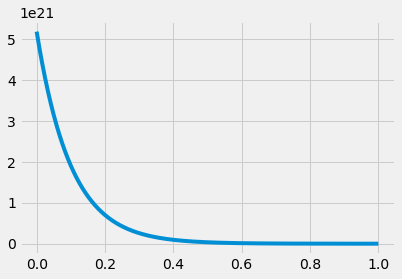

In [6]:
x1 = np.linspace(0,1,100000)
x2 = np.linspace(0,1,100000)
y = np.exp(5* (np.abs(x1-5) + np.abs(x2-5)) )
#print(np.mean(y))
#print(np.var(y))
plt.plot(x1,y)
plt.show()
#for i in range(0,samples):
    

- Most of the contribution is for x1 and x2 is between 0 and 0.4, however this is at a large scale, 
  1e21, so even the smaller values have some contribution.

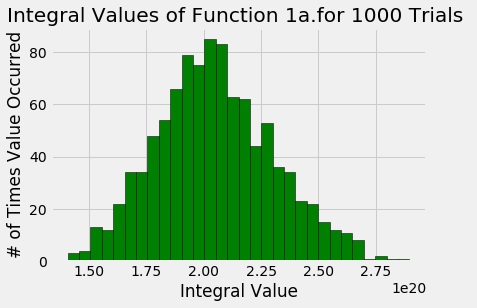

In [7]:

integrals_importance = np.empty(trials)
integral_range = 1

for i in range(0,trials):
    integral_sum_imp = 0
    x1_rand = np.zeros(samples) 
    x2_rand = np.zeros(samples) 
    for j in range(0,samples):
        x1_rand[j] = np.log(1+ (np.exp(1)-1)*np.random.rand()) 
        x2_rand[j] = np.log(1+ (np.exp(1)-1)*np.random.rand())
        #scaling uniform values to fit range around 0 to 0.4
        integral_sum_imp += ((np.exp(1)-1) * (np.exp(1)-1) *np.exp(50 - 6 * (x1_rand[j]+ x2_rand[j])))
    integral_sum_imp = integral_sum_imp * integral_range/1000
    integrals_importance[i] = (integral_sum_imp)
plt.hist(integrals_importance, bins = 30, edgecolor = 'black', facecolor = 'green' )

plt.xlabel("Integral Value")
plt.ylabel("# of Times Value Occurred")
plt.title("Integral Values of Function 1a.for 1000 Trials ")
plt.style.use('fivethirtyeight')
plt.show()
imp_var = 2*np.std(integrals_importance)/np.sqrt(samples)

In [8]:
print("True answer is 2.04e20")
print("Mean with importance sampling from 1000 trials: ", np.mean(integrals_importance))
print("Variance with importance sampling from 1000 trials: ", str(imp_var))

True answer is 2.04e20
Mean with importance sampling from 1000 trials:  2.0495795452807833e+20
Variance with importance sampling from 1000 trials:  1.6205463336303475e+18


### 1a Analysis

- The first graph is one where a standard Monte Carlo method was used. It determines the mean with good accuracy, but the variance is a little large, but the large variance makes sense given how large the values we are calculating are
- In the 2nd graph, where we used stratified sampling, the variance is reduced by a factor of 10. In the grand scheme of things however, this is not super significant since the variance is still incredible large. 
- In the 3rd graph, we use importance sampling. Here, we get significant improvement of variance. The amount of variance drops by factor of 1e19, over 50% in reduction.

## 1b 

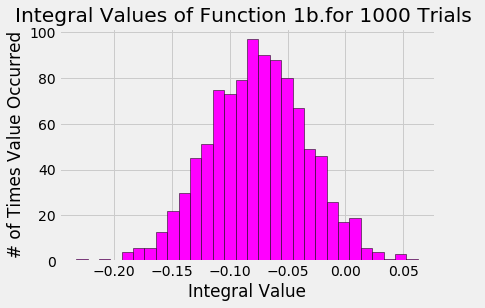

In [9]:
integrals_1b = np.empty(trials)
integral_range_1b = 2
def func_2(x1,x2):
    return np.cos(np.pi+ 5*x1+5*x2)


for i in range(0,trials):
    integral_sum_1b = 0
    x1_rand = np.zeros(samples) 
    x2_rand = np.zeros(samples) 
    for j in range(0,samples):
        x1_rand[j] = 2*np.random.rand()-1
        x2_rand[j] = 2*np.random.rand()-1
        integral_sum_1b += func_2(x1_rand[j], x2_rand[j])
    integral_sum_1b = integral_sum_1b*2 / samples
    integrals_1b[i] = (integral_sum_1b)



plt.hist(integrals_1b, bins = 30, edgecolor = 'black', facecolor = 'magenta' )
plt.xlabel("Integral Value")
plt.ylabel("# of Times Value Occurred")
plt.title("Integral Values of Function 1b.for 1000 Trials ")
plt.style.use('fivethirtyeight')
plt.show()


In [10]:
print("True answer is -0.147")
print("Mean from 1000 trials: ", np.mean(integrals_1b))
print("Variance from 1000 trials: ", np.var(integrals_1b))

True answer is -0.147
Mean from 1000 trials:  -0.07571515303129409
Variance from 1000 trials:  0.001817137574374486


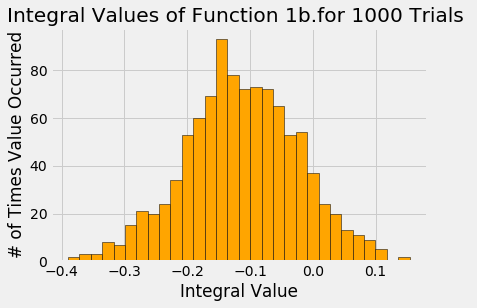

In [11]:

k = 10
integrals_strat_1b = np.empty(trials)
n_ij = int(samples/(k*k)) #stratified into partitions of 10 with equal probability for each xi
#print(n_ij)
for sample in range(0,1000):
    integral_strat_1b = 0

    for i in range (0, k):
        for j in range(0, k):  
            for l in range(0, n_ij):
                x1 = i + np.random.uniform(-1,1)
                x2 = j + np.random.uniform(-1,1)
                integral_strat_1b += func_2(x1/k, x2/k)
    
    integrals_strat_1b[sample] = (-integral_strat_1b/100)
plt.hist(integrals_strat_1b, bins = 30, edgecolor = 'black', facecolor = 'orange' )
plt.xlabel("Integral Value")
plt.ylabel("# of Times Value Occurred")
plt.title("Integral Values of Function 1b.for 1000 Trials ")
plt.style.use('fivethirtyeight')
plt.show()


In [12]:
print("True answer is -0.147")
print("Mean from 1000 trials: ", np.mean(integrals_strat_1b))
print("Variance from 1000 trials: ", np.var(integrals_strat_1b))

True answer is -0.147
Mean from 1000 trials:  -0.11351836966657512
Variance from 1000 trials:  0.008159318728183181


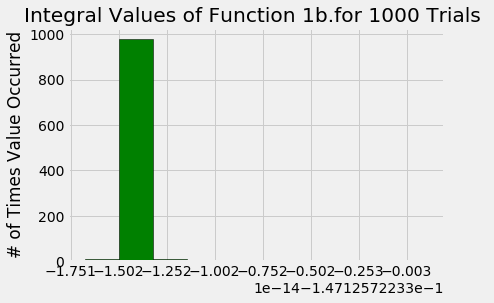

In [13]:

integrals_importance_1b = np.empty(trials)
integral_range = 2

for i in range(0,trials):
    integral_sum_imp_1b = 0
    x1_rand = np.zeros(samples) 
    x2_rand = np.zeros(samples) 
    for j in range(0,samples):
        x1_rand[j] = np.arcsin(2*np.random.rand()*np.sin(5) - np.sin(5))/5  #np.log(1+ (np.exp(1)-1)*np.random.rand()) 
        x2_rand[j] = np.arcsin(2*np.random.rand()*np.sin(5) - np.sin(5))/5 #np.log(1+ (np.exp(1)-1)*np.random.rand())
        #scaling uniform values to fit range around 0 to 0.4
        integral_sum_imp_1b += (( (2*np.sin(5)/5) * (2*np.sin(5)/5) \
           * np.cos(np.pi + 5*(x1_rand[j] + x2_rand[j]))) / np.cos(5 *(x1_rand[j] + x2_rand[j])) )
                             
    integral_sum_imp_1b = integral_sum_imp_1b /1000
    integrals_importance_1b[i] = (integral_sum_imp_1b)
plt.hist(integrals_importance_1b, edgecolor = 'black', facecolor = 'green' )

#plt.xlabel("Integral Value")
plt.ylabel("# of Times Value Occurred")
plt.title("Integral Values of Function 1b.for 1000 Trials ")
plt.style.use('fivethirtyeight')

plt.show()
imp_var_1b = 2*np.std(integrals_importance_1b)/np.sqrt(samples)

In [14]:
print("True answer is -0.147")
print("Mean with importance sampling from 1000 trials: ", np.mean(integrals_importance_1b))
print("Variance with importance sampling from 1000 trials: ", str(imp_var_1b))

True answer is -0.147
Mean with importance sampling from 1000 trials:  -0.1471257223261144
Variance with importance sampling from 1000 trials:  3.763975351866937e-17


### 1b Analysis

- The first graph is one where a standard Monte Carlo method was used. It does not determine the mean with good accuracy where the estimated value is only half the true value, but the variance is very small, which makes sense given the true value of the integral is small as well, around -0.147.
- In the 2nd graph, where we used stratified sampling, we get an improvement in the mean estimation. It comes to within a few hundreths of the true mean, but here we get slightly worse variance. 
- In the 3rd graph, we use importance sampling. Here, we get significant improvement of variance from stratified sampling. We get a reduction in variance of over 13 orders of magnitude, and the estimation of the mean comes to within a ten thousandth of the true value. 